In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/WebM_csproject/dataset'
files = os.listdir(file_path)
print(files)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['users_fr.csv', 'items_en.csv', 'explicit_ratings_fr.csv', 'implicit_ratings_fr.csv', 'users_en.csv', 'implicit_ratings_en.csv', 'items_fr.csv', 'explicit_ratings_en.csv']


#**English dataset**

In [4]:
df_exprate_en = pd.read_csv(file_path + '/'+ 'explicit_ratings_en.csv')
df_users_en = pd.read_csv(file_path + '/'+ 'users_en.csv')
df_imprate_en = pd.read_csv(file_path + '/'+ 'implicit_ratings_en.csv')
df_items_en = pd.read_csv(file_path + '/'+ 'items_en.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Small EDA

In [ ]:
df_users_en_job = df_users_en.groupby('job').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


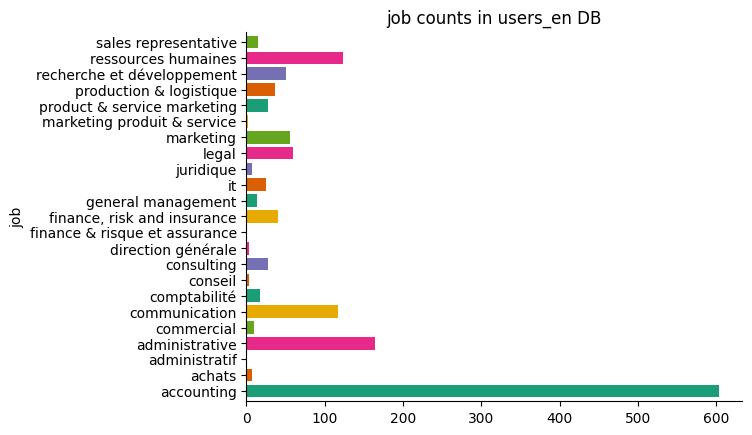

In [6]:
df_users_en_job.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), title="job counts in users_en DB", width = 0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
df_exprate_4plot = df_exprate_en.loc[:,['user_id', 'watch_percentage', 'rating']]
df_exprate_4plot2 = df_exprate_en.loc[:,['item_id', 'watch_percentage', 'rating']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


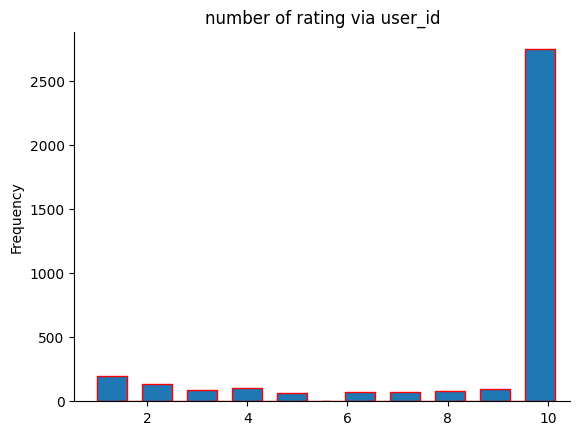

In [64]:
df_exprate_4plot['rating'].plot(kind='hist', bins=20, title='number of rating via user_id', xlabel='ratings', width = 0.6, edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


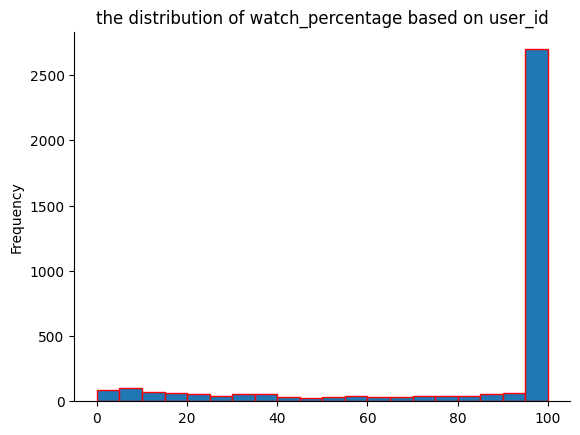

In [65]:
df_exprate_4plot['watch_percentage'].plot(kind='hist', bins=20, title='the distribution of watch_percentage based on user_id', xlabel = 'watch_percentage', edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


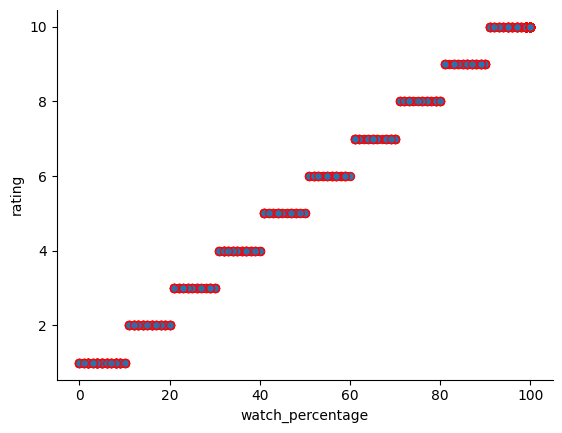

In [22]:
df_exprate_4plot.plot(kind='scatter', x='watch_percentage', y='rating', s=32, alpha=.8, edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
exprate_item = df_exprate_4plot2.groupby('item_id').sum()/df_exprate_4plot2.groupby('item_id').count()
exprate_item.round(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,watch_percentage,rating
item_id,,
510,87.63,8.87
511,73.38,7.54
512,73.01,7.51
513,96.00,9.67
514,95.11,9.56
...,...,...
393132,100.00,10.00
403215,100.00,10.00
403216,76.50,8.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


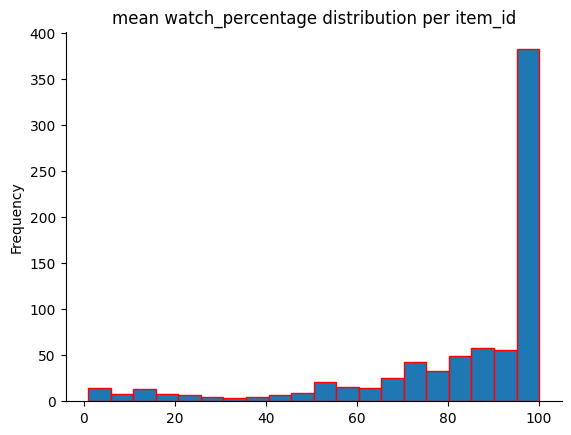

In [66]:
exprate_item['watch_percentage'].plot(kind='hist', bins=20, title='mean watch_percentage distribution per item_id', edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


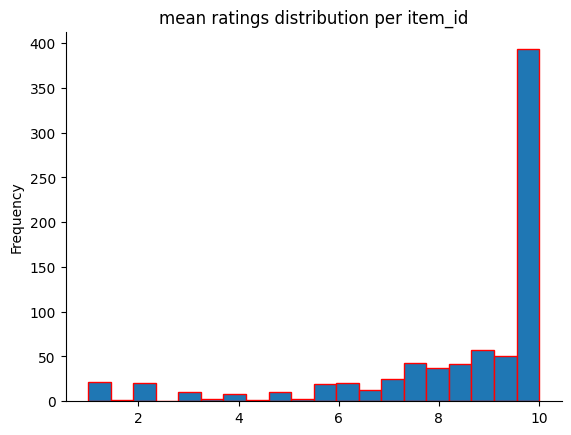

In [67]:
exprate_item['rating'].plot(kind='hist', bins=20, title='mean ratings distribution per item_id', edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
exprate_user = df_exprate_4plot.groupby('user_id').sum()/df_exprate_4plot.groupby('user_id').count()
exprate_user.round(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,watch_percentage,rating
user_id,,
672,100.0,10.0
856,5.0,1.0
3928,100.0,10.0
4160,100.0,10.0
4448,100.0,10.0
...,...,...
607339,64.5,6.5
607825,100.0,10.0
608098,30.0,3.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


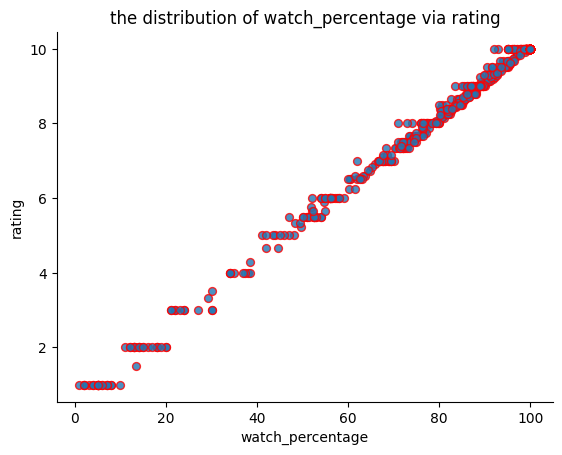

In [62]:
exprate_item.plot(kind='scatter', x='watch_percentage', y='rating', s=32,title = 'the distribution of watch_percentage via rating', alpha=.8, edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


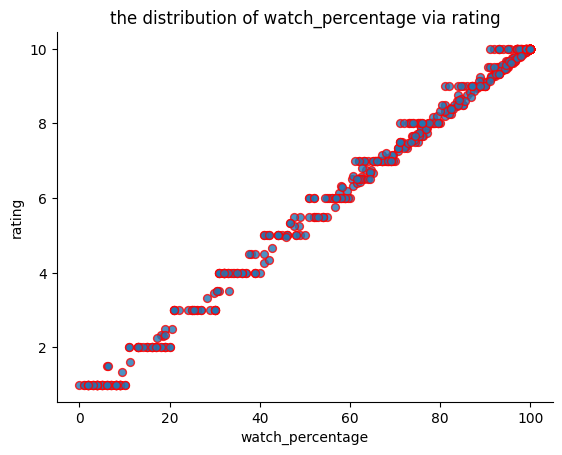

In [61]:
exprate_user.plot(kind='scatter', x='watch_percentage', y='rating', title = 'the distribution of watch_percentage via rating', s=32, alpha=.8, edgecolor = 'red')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_items_en

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Software,Theme,duration,type
0,510,en,What is OneDrive for Business?,1114.0,OneDrive for Businessis an online libraryto st...,2016,Beginner,[],['OneDrive'],['Discover'],42.0,tutorial
1,511,en,"Add, restore, delete documents on OneDrive",547.0,"To create a new document in OneDriveclick New,...",2016,Beginner,[],['OneDrive'],"['Share', 'Produce', 'Organize']",122.0,tutorial
2,512,en,Share documents,607.0,"By default, all content is private, so you don...",2016,Beginner,[],['OneDrive'],"['Share', 'Collaborate']",176.0,tutorial
3,513,en,Recycle bin,278.0,"When you delete a file or afolder, OneDrive gi...",2016,Beginner,"['Accounting', 'Financial', 'Human resources',...",['OneDrive'],"['Produce', 'Organize']",46.0,tutorial
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,The one drive synchronization application is a...,2016,Beginner,[],['OneDrive'],"['Produce', 'Organize']",163.0,tutorial
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,422593,en,Create custom fields,22.0,NaN,2021,NaN,[],['Bookings'],"['Produce', 'Customize']",81.0,tutorial
1163,422594,en,Make a reservation [Customer],22.0,NaN,2021,NaN,[],['Bookings'],['Produce'],133.0,tutorial
1164,422595,en,Make a reservation [Staff],19.0,NaN,2021,NaN,[],['Bookings'],['Produce'],115.0,tutorial
1165,422596,en,Manage your availabilities,19.0,NaN,2021,NaN,[],['Bookings'],['Organize'],102.0,tutorial


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


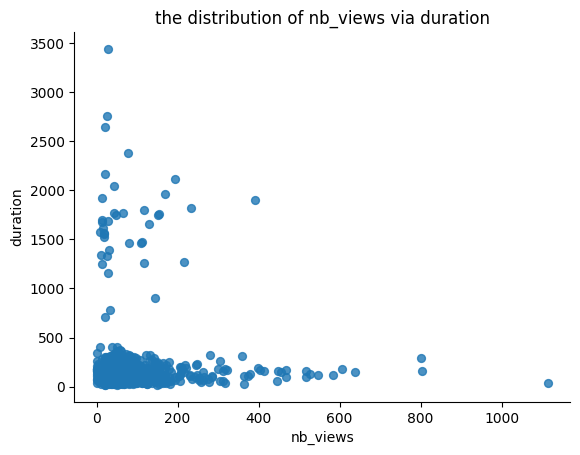

In [60]:
df_items_en.loc[:,['nb_views','duration']].plot(kind='scatter', title = 'the distribution of nb_views via duration', x='nb_views', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Processing for FP-Growth

In [ ]:
df_items_en_itemsgenre = df_items_en.loc[:,['item_id','Job','Theme']]
print(df_items_en_itemsgenre.head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_items_en['Theme'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(["['Discover']", "['Share', 'Produce', 'Organize']",
       "['Share', 'Collaborate']", "['Produce', 'Organize']",
       "['Produce']", "['Customize']", "['Customize', 'Communicate']",
       "['Research']", "['Organize']", "['Communicate']",
       "['Organize', 'Communicate']", "['Share']", '[]',
       "['Share', 'Collaborate', 'Communicate']",
       "['Produce', 'Collaborate']", "['Share', 'Organize']",
       "['Share', 'Produce']", "['Discover', 'Research']",
       "['Collaborate', 'Customize']", "['Collaborate']",
       "['Discover', 'Organize']", "['Discover', 'Produce']",
       "['Analyze']", "['Produce', 'Customize']",
       "['Produce', 'Research']", "['Collaborate', 'Communicate']",
       "['Share', 'Organize', 'Collaborate']", "['Organize', 'Analyze']",
       "['Share', 'Communicate']", "['Organize', 'Collaborate']",
       "['Discover', 'Collaborate']", "['Produce', 'Analyze']",
       "['Mobility']", "['Discover', 'Collaborate', 'Communicate']",
       "['D

In [ ]:
df_items_en['Job'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['[]',
       "['Accounting', 'Financial', 'Human resources', 'Project manager', 'Project management', 'Assistant', 'Communication', 'Marketing']",
       "['Accounting', 'Financial', 'Human resources', 'Project manager', 'Assistant', 'Communication', 'Marketing']",
       "['Accounting', 'Project manager', 'Project management', 'Assistant', 'Communication', 'Marketing']",
       "['Accounting', 'Financial', 'Human resources', 'Project manager', 'Communication', 'Marketing']",
       "['Accounting', 'Human resources', 'Project manager', 'Project management', 'Assistant', 'Communication', 'Marketing']",
       "['Accounting', 'Financial', 'Human resources', 'Project manager', 'Project management', 'Communication', 'Marketing']",
       "['Accounting', 'Financial', 'Human resources', 'Project management', 'Assistant', 'Communication', 'Marketing']",
       "['Accounting', 'Financial', 'Human resources', 'Project management', 'Communication', 'Marketing']",
       "['Accounting', 'F

In [ ]:
import ast
unique_jobs = df_items_en['Job'].unique()
job_lists = []

for jobs in unique_jobs:
  if jobs == "[]":
    continue
  job = ast.literal_eval(jobs)
  for item in job:
    job_lists.append(item)

In [ ]:
unique_themes = df_items_en['Theme'].unique()
theme_lists = []

for themes in unique_themes:
  if themes == "[]":
    continue
  theme = ast.literal_eval(themes)
  for item1 in theme:
    theme_lists.append(item1)

print(theme_lists)

In [ ]:
def unique_values(input_list):
    unique_list = []
    for item in input_list:
        if item not in unique_list:
            unique_list.append(item)
    return unique_list

In [ ]:
unique_job_lists = unique_values(job_lists)
print(unique_job_lists)

['Accounting', 'Financial', 'Human resources', 'Project manager', 'Project management', 'Assistant', 'Communication', 'Marketing', 'Salesman', 'Manager']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unique_theme_lists = unique_values(theme_lists)
print(unique_theme_lists)

['Discover', 'Share', 'Produce', 'Organize', 'Collaborate', 'Customize', 'Communicate', 'Research', 'Analyze', 'Mobility', 'Telephony & Visio', 'New features', 'Other Products', 'Accessibility', 'Security']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#tiếp

In [ ]:
unique_values1 = [job for job in unique_job_lists]
unique_values2 = [theme for theme in unique_theme_lists]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#FP-Growth tree

In [ ]:
def count_occurrences_job(job_list):
    return {value: job_list.count(value) for value in unique_values1}

def count_occurrences_theme(theme_list):
    return {value: theme_list.count(value) for value in unique_values2}

resultjob_df = df_items_en_itemsgenre['Job'].apply(count_occurrences_job).apply(pd.Series)
resultjob_df = resultjob_df.fillna(0)
resultjob_df = resultjob_df.astype('bool')

resulttheme_df = df_items_en_itemsgenre['Theme'].apply(count_occurrences_theme).apply(pd.Series)
resulttheme_df = resulttheme_df.fillna(0)
resulttheme_df = resulttheme_df.astype('bool')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
resultjob_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accounting,Financial,Human resources,Project manager,Project management,Assistant,Communication,Marketing,Salesman,Manager
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1162,False,False,False,False,False,False,False,False,False,False
1163,False,False,False,False,False,False,False,False,False,False
1164,False,False,False,False,False,False,False,False,False,False
1165,False,False,False,False,False,False,False,False,False,False


In [ ]:
fpgrowth(resultjob_df, min_support=1/1167, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.186804,(Marketing)
1,0.130249,(Communication)
2,0.127678,(Financial)
3,0.089974,(Project manager)
4,0.088260,(Project management)
...,...,...
260,0.000857,"(Manager, Project manager)"
261,0.000857,"(Assistant, Project management, Manager)"
262,0.000857,"(Assistant, Manager, Project manager)"
263,0.000857,"(Project management, Manager, Project manager)"


In [ ]:
resulttheme_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Discover,Share,Produce,Organize,Collaborate,Customize,Communicate,Research,Analyze,Mobility,Telephony & Visio,New features,Other Products,Accessibility,Security
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1163,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1164,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1165,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
fpgrowth(resulttheme_df, min_support=1/1167, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.077978,(Discover)
1,0.203085,(Produce)
2,0.099400,(Organize)
3,0.053985,(Share)
4,0.070266,(Collaborate)
...,...,...
79,0.001714,"(Accessibility, Other Products, Mobility)"
80,0.001714,"(Accessibility, Mobility)"
81,0.000857,"(Accessibility, Customize)"
82,0.009426,"(Security, Collaborate)"


**=>** *Here we can follow the string of Theme and Job to get related chained course for specified user.*

#**French dataset**

In [ ]:
df_exprate_fr = pd.read_csv(file_path + '/'+ 'explicit_ratings_fr.csv')
df_imprate_fr = pd.read_csv(file_path + '/'+ 'implicit_ratings_en.csv')

In [ ]:
df_users_fr = pd.read_csv(file_path + '/'+ 'users_fr.csv')

In [ ]:
df_items_fr = pd.read_csv(file_path + '/'+ 'items_fr.csv')

In [ ]:
df_items_fr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Software,Theme,duration,type
0,1,fr,Communiquer : qui peut m'aider ? Qui est dispo...,1039.0,Bonjour et bienvenue sur cette présentation do...,2016,Beginner,[],[],[],1980.0,webcast
1,2,fr,"Partager : mises à jour régulières, qui peut f...",558.0,Bonjour bienvenue à sous Windows Vista je nous...,2016,NaN,[],[],[],1757.0,webcast
2,3,fr,"Collaborer : je finis la 1ère partie, je te la...",703.0,Voila Bonjour à tous je me présente réellement...,2016,Beginner,[],[],[],2231.0,webcast
3,4,fr,Chercher : quelles sont les dernières publicat...,248.0,Bonjour à toutes et à tous euh merci de cette ...,2016,Beginner,[],[],[],1925.0,webcast
4,5,fr,Produire : finalisez vos documents à distance,445.0,Bonjour bienvenue sur cette plantation codina ...,2016,Beginner,[],[],[],1476.0,webcast
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,420073,fr,Intégrer Bookings dans Teams,41.0,NaN,2021,NaN,[],['Bookings'],['Produire'],103.0,tutorial
1447,426111,fr,La retranscription automatique,4.0,NaN,2021,NaN,[],['Microsoft Teams'],"['Collaborer', 'Nouveauté']",89.0,tutorial
1448,426112,fr,Mettre en avant un participant,3.0,NaN,2021,NaN,[],['Microsoft Teams'],"['Collaborer', 'Nouveauté']",72.0,tutorial
1449,426113,fr,Enregistrer automatiquement une réunion,3.0,NaN,2021,NaN,[],['Microsoft Teams'],"['Collaborer', 'Nouveauté']",61.0,tutorial
